# CS102/CS103: Week 04 - Logic, and Fruitful functions <span style='color:red'>(V1.0)</span>

<font size="+1">Lecture notes for Week 4 of CS102/CS103, 19+20 Oct, 2022. You can also find these notes as a HTML file and Jupyter notebook on BINDER at [https://mybinder.org/v2/gh/niallmadden/2223-cs103/main](https://mybinder.org/v2/gh/niallmadden/2223-cs103/main)
</font>
<br />
<font size="-1">Dr [Niall Madden](mailto:Niall.Madden@UniversityOfGalway.ie), School of Mathematical and Statistical Sciences, 
University of Galway.
</font>

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/niallmadden/2223-cs103/main)



***

*This notebook was written by Niall Madden, and uses some material by Tobias Rossmann, and from textbook, [Think Python](https://greenteapress.com/thinkpython2/html), in particular*
* Chapter 5:  Conditionals and recursion
* Chapter 6:  Fruitful functions


## News: 
### Lab 2 this week

<div class="alert alert-block alert-info">
   In Lab 2 of CS102, you are expected to write a function that counts the number of occurences of the letter `A` in a DNA sequence. You don't have to submit anything this week, but you'll develop the code further for an assignment next week.   
    </div>

### Jupyter 

* We are busy porting the Jupyter server, [https://jupyter.nuigalway.ie/](https://jupyter.nuigalway.ie/), to AWS. When that happens, we may not be able to move all your files. Please download anything you want to keep no later than Thursday.
* You can still try Jupyter at  [https://jupyter.org/](https://jupyter.org/) 
* Or at [https://colab.research.google.com/](https://colab.research.google.com/)

## Boolean Expressions

We learned last week that an _expression_ is something that can be evaluated, like `1+2-3/4*5`.

A **Boolean expression** is one that evaluate as either `True` or `False`. (They are named in honour of [George Boole](https://mathshistory.st-andrews.ac.uk/Biographies/Boole), first Professor of Mathematics at University College Cork, and a founder of the mathematical theory of logic).

Some examples:

In [1]:
(2+2)==4

True

In [4]:
123 == (1+2+3)

False

Note that
* "*double equals*", `==` is used to check equality,
* "*single equals*", `=` is used for assignment. 

Here is what happens if you mix them up:

In [5]:
123 = (1+2+3)

SyntaxError: cannot assign to literal (2141377799.py, line 1)

In [9]:
x == 123 

False

The keywords `True` and `False` look like strings, but are not: they belong to their own data type, `bool`:


In [10]:
type(True)

bool

In [11]:
type ( (1+2+3) == 6)

bool

In [13]:
print ( ( (1+2+3)==6) == "True")

False


### Relational Operators

The equality operator is one of several that tests how expressions relate to each other. The important relational operators include:
 
| Python | Mathematics | meaning |
|:-:|:-:|:--|
| `a < b` | $a < b$ | Is $a$ less than $b$? |
| `a <= b` | $a \leq b$ | Is $a$ less than or equal to $b$? |
| `a == b` | $a = b$ | Is $a$ equal to $b$? |
| `a >= b` | $a \geq b$ | Is $a$ greater than or equal to $b$? |
| `a > b` | $a > b$ | Is $a$ greater than $b$? |
| `a != b` | $a \neq b$ | Is $a$ different from $b$? |
| `a in b` | $a \in b$ | Does $a$ belong to $b$? |

Note that some of these operators consist of **two symbols**; there must be no space between them!

In [14]:
a=3.4
b=34
a <= b

True

In [16]:
"Galway" > "Mayo" # Strings are compared lexicographically ("dictionary order"):

False

In [21]:
'wlay' in 'Galway'

False

In [22]:
s = "GALWAY"
s.isupper()

True

### Logical Operators

There are *three logical operators*: 
* `X and Y`, which is true if both the expressions 'X' and 'Y' evaluate as 'True'; otherwise is 'False`
* `X or Y`, which is true if at least one of the expressions 'X' and 'Y' evaluate as 'True'; it is `False` only when both are `False`
* `not X`, which is `True` when `X` is `False` and _vice versa_.



In [23]:
x = 8
y = -1
print('(x > 0) and (x < 10) is ', (x > 0) and (x < 10))
print('(y > 0) and (y < 10) is ', (y > 0) and (y < 10))

(x > 0) and (x < 10) is  True
(y > 0) and (y < 10) is  False


In [24]:
True and True

True

In [25]:
True and False

False

In [26]:
False and True

False

In [27]:
False and False

False

In [28]:
x = 122
y = 55
z = 4
print('The statement "x is largest" is', (x >= y) and (x >= z))

The statement "x is largest" is True


In [29]:
print('The statement "y not smallest" is', (y >= x) or (y >= z))

The statement "y not smallest" is True


In [30]:
print('The statement "z not smallest" is', (z >= x) or (z >= y))

The statement "z not smallest" is False


In [39]:
print("not False = ", not False)  

not False =  True


In [31]:
True or True

True

In [32]:
True or False

True

In [33]:
False or True

True

In [34]:
False or False

False

In [35]:
'u' in "University of Galway" # Note: case-sensitive

False

In [36]:
not( 'u' in "University of Galway")

True

In [37]:
not True

False

In [38]:
not False

True

> Strictly speaking, the operands of the logical operators should be boolean expressions, but Python is not very 
> strict. Any nonzero number is interpreted as True:


In [45]:
not ("-10")

False

This flexibility can be useful, but there are some subtleties to it that might be confusing. You might want to avoid it.

In [46]:
not ("False") # the string "False" is not the same as the bool False

False

Many functions return a `bool` value. For example, the string methods `islower()` and `isupper()`

In [17]:
s = 'HELLO'
print('s.isupper()=', s.isupper())

s.isupper()= True


## Detour: getting fancy with `print()`

Before we learn how to use Boolean expressions with things called `if` statements, let's see how to get `print()` to be more flexible. We do this using **format strings**, usually called `f-strings`. 

An `f-string` is like a standard string, but
* starts with the character `f` before the quotes. E.g., ``f"hello"``
* if the string contains an expression between `{` and `}` it is evaluated.


Given a variable `x`, we can display its value as:

In [47]:
print("x=", x)

x= 122


This can be also done with 

In [48]:
print(f"x={x}")

x=122


Other examples:

In [52]:
name = "George Boole"
job = "professor"
alergy = "rain"
print(f"Hello, my name is {name}, and I work as a {job}. I don't like {alergy}.")
print("Hello, my name is", name, ", and I work as a", job,". I don't like", alergy, ".")

Hello, my name is George Boole, and I work as a professor. I don't like rain.
Hello, my name is George Boole , and I work as a professor . I don't like rain .


We can also call functions in an f-string:

In [54]:
print(f"1. Hello, my name is {name}, and I work as a {job}")
print(f"2. Hello, my name is {name.upper()}, and I work as a {job.capitalize()}") 

1. Hello, my name is George Boole, and I work as a professor
2. Hello, my name is GEORGE BOOLE, and I work as a Professor


We can also use f-strings to format numbers, for example, to determine how many decimal places of a float to show. 

Syntax: `{var:.3f}` to show, e.g., 3 decimal places of the `float` stored as `var`.
Example:


In [55]:
GB_born = 1815
GB_moved_to_Cork = 1849
GB_died = 1864 
percent_life_in_Cork = 100*(GB_died-GB_moved_to_Cork)/(GB_died-GB_born)
print(f"George Boole spent {percent_life_in_Cork}% of his life in Cork")

George Boole spent 30.612244897959183% of his life in Cork


This would be better as

In [59]:
print(f"George Boole spent {percent_life_in_Cork:.2f}% of his life in Cork")

George Boole spent 30.61% of his life in Cork


In [67]:
# Checking how rounding works
print(f"{1.6354:.1f}")
print(f"{1.6374:.2f}")
print(f"{1.6374:.3f}")
print(f"{1.6374:.4f}")


1.6
1.64
1.637
1.6374


<div class="alert alert-block alert-info">Finished here Wednesday</div>

## Arcane Interlude 3: Sound Out!

It's that time of the week when I pause trying to teach Python, and just demo something fun/silly/cool stuff. As usual, emphasis is on application, not explanation

**Want to play some music while coding? Here is one way:*

In [2]:
import scipy.io.wavfile as wav
import sounddevice as sd

AGS_fs, AGS_x = wav.read('Bach-AirOnAGString.wav')
sd.play(AGS_x, AGS_fs)

Some other things you can do:

In [4]:
sd.stop() # stop playing
duration = len(AGS_x)/AGS_fs
print(f"That piece lasts {int(duration//60)} minutes and {int(duration%60)} seconds" )

That piece lasts 3 minutes and 3 seconds


Speed it up!

In [76]:
sd.stop()
sd.play(AGS_x, 2*AGS_fs)

Play it backwards!

In [3]:
sd.stop()
sd.play(AGS_x[-1:0:-1,:], AGS_fs)

Visualise it

808358.4

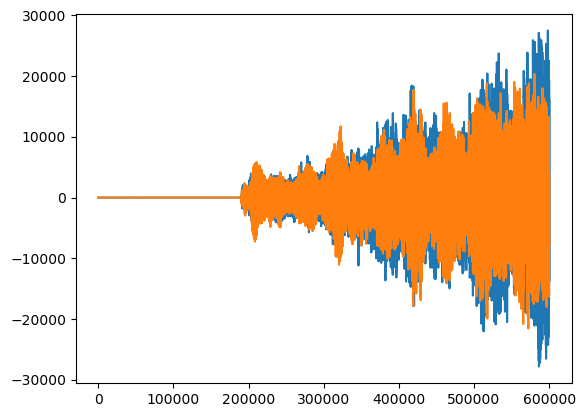

In [16]:
import matplotlib.pyplot as plt
plt.plot(AGS_x[0:600000,:])
len(AGS_x)/10

## Conditional execution: `if` statements
### Syntax

In order to write useful programs, we need the ability to check conditions and change the behavior of the program accordingly. Conditional statements give us this ability. The simplest form is the `if` statement. The syntax is a little like a function:  a header followed by an indented body. 

```python
if (Boolean Expression):
    do something
    Another thing
# Ends with an un-indented line
```

```python
if (Boolean Expression):
    do something
    Another thing
# Ends with an un-indented line
```

* `if` is a key word
* followed by a Boolean Expression. I usually write this in `(...)` for clarity, but that is not required.
* the `if` line ends with a colon
* the next lines are intented. They are executed if the Bollean expression evaluates as `True`. Otherwise they are ignored.

In [ ]:
x = 19
if ( (x%2) == 1):   # reminder on dividing x by 2 is 1.
    print(f"{x} is odd")
   

In [ ]:
y = 20
if ( (y%2) == 0):
    print(f"{y} is even")

In [ ]:
dna_string = 'ACGTtgaGA'
if (not dna_string.isupper()):
    print(f"Warning: string {dna_string} should be in uppercase")


### The `if`-`else` statement

When writing an `if` statement, we usually want to do one thing when the condition is true, and another when it is false. For this we use an `if`-`else` statement. General form
```python
if <condition>:
    <body_1>
else:
    <body_2>
```
When executed, `<condition>` is evaluated.
If its value is `True`, the statements in `<body_1>` are executed; if its value is `False`, then the statements in `<body_2>` are executed instead.

Example: check if a number is *odd or even*

In [ ]:
x = 19
if ( (x%2) == 1):
    print(f"{x} is odd")
else:
    print(f"{x} is even")

In [ ]:
def is_odd_or_even(n):
    if ( (n % 2) == 1):
        print(f"{n} is odd")
    else:
        print(f"{n} is even")

In [ ]:
is_odd_or_even(23)

### The `if`-`elif`-`else` statement

In the book these are called "Chained Conditionals". They are the most general form of the `if`-statement:
```python
if <condition_1>:
    <body_1>
elif <condition_2>:
    <body_2>
# ...  
elif <condition_n>:
    <body_n>
else:
    <body_0>
```

(The final `else`-clause is optional, as are the `elif`-clauses.)

In [21]:
def is_int_odd_or_even(n):
    if (type(n) != int):
        print(f"Warning: this function works for ints but you gave {n} what is {type(n)}")
    elif ( (n % 2) == 1):
        print(f"{n} is odd")
    else:
        print(f"{n} is even")

In [22]:
is_int_odd_or_even(123)

123 is odd


In [23]:
is_int_odd_or_even(1230)

1230 is even


In [24]:
is_int_odd_or_even(1230.01)

In [25]:
is_int_odd_or_even("Galway")

## Fruitful functions

So far, the functions we have written "do something, but don't return anything". They are $\color{red}{\text{void}}$ functions. For example the `is_int_odd_or_even()` function just prints a message. 

Suppose we want to write a function `is_even()`. It would make sense for it to return a `bool` value.

This is done with the `return` statement. 
Example:


In [31]:
def is_even(n):
    if ( (n % 2) == 0):
        return True
    else:
        return False
    
answer = is_even(120)
print(answer)

True


In [33]:
x=129
print(f'The statement "{x} is even" is {is_even(x)}')

The statement "129 is even" is False


### The temperature conversion function again
Last week we wrote a function that prompted the user for a temperature in Fahrenheit, and returned the equivalent temperature in Celsius. It would make sense to rewrite this function so that it takes the Fahrenheit temperature as an input, and gave the Celsius value as an output.


In [40]:
# Function to convert Fahrenheit into Celsius 
def convert(fahrenheit):
    Celsius = 5/9 * (fahrenheit - 32)
    return Celsius

t_Fah = 96
t_Cel = convert(t_Fah)
print(f"{t_Fah} in Fahrenheit is {t_Cel:.3f}")

96 in Fahrenheit is 35.556


In [39]:
t_Fah = 32
t_Cel = convert(t_Fah)
print(f"{t_Fah} in Fahrenheit is {t_Cel:.3f}")

32 in Fahrenheit is 0.000


### Recursive functions
A function is **recursive** if it calls itself. A simple example is the "power" function. We know that
$$ a^n = \underbrace{a \times a \times a \times \cdots \times a}_{n \text{ times}}$$

This can also be written as 
$$ a^n = a \times a^{n-1}.$$
We can use this formula again to get $a^{n-1}$:
$$ a^{n-1} = a \times a^{n-2}.$$
and 
$$ a^{n-2} = a \times a^{n-3}.$$
We stop when we get to $a^0$ and use $a^0=1$.

This is an example of a **recursive** function. Here is how to code it:

In [42]:
def my_power(a, n):
    if (n == 0):
        return 1
    else:
        return a*my_power(a, n-1)
    
my_power(2,10)
    

1024

### Is that a palindrome?

A **palindrome** is a word (or phrase) that spells the same forward and backward. Examples of palindromes include
* mom, dad and bob
* ABBA, noon
* kayak, level, deified, rotator.

The simplest way, in Python, of checking if a string is a palindome is as follows

In [46]:
s = "level"
print(f"{s} is a palindrome? {s == s[-1::-1]}")

level is a palindrome? True


False

In [47]:
t = "python"
print(f"{t} is a palindrome? {t == t[-1::-1]}")


python is a palindrome? False


In out last example, we'll write a recursive function that checks if a word is a palindrome. 
For exposition, it uses a more complicated method:
> If a word is a palindrome then
> * Its first and last letters are the same
> * And the word we get by removing the first and last letters is a palindrome (the "empty" word is a palindrome).

In [53]:
def is_palindrome(word):
    if len(word)==0:
        return True
    elif (word[0] != word[-1]):
        return False
    else:
        new_word = word[1:-1]
        return(is_palindrome(new_word))
        

In [54]:
is_palindrome("navan")

True

In [55]:
is_palindrome("galway")    

False

<div class="alert alert-block alert-info">Finished here.</div>